# Tugas Python 1

## Library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## load dataset

In [3]:
df = pd.read_csv('../Dataset/london_crime_by_lsoa.csv')

In [4]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


## EDA

In [5]:
# mengetahui jumlah baris dan kolom
df.shape 

(13490604, 7)

In [6]:
# describe() untuk mengetahui statistik deskriptif dari data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
value,13490604.0,0.477944,1.771513,0.0,0.00,0.0,1.00,309.0
year,13490604.0,2012.000000,2.581989,2008.0,2010.00,2012.0,2014.00,2016.0
month,13490604.0,6.500000,3.452053,1.0,3.75,6.5,9.25,12.0


In [7]:
# mengecek nilai yang hilang
df.isnull().values.any()
# dihasilkan nilai False, artinya tidak ada nilai yang hilang jadi tidak perlu dilakukan penghapusan data

False

In [5]:
# menjumlahkan jumlah kasus kejahatan berdasarkan tahun
tahun_count = df.groupby('year')['value'].sum()
tahun_count = pd.DataFrame(tahun_count)
tahun_count.reset_index(inplace=True)
tahun_count

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


## area plot

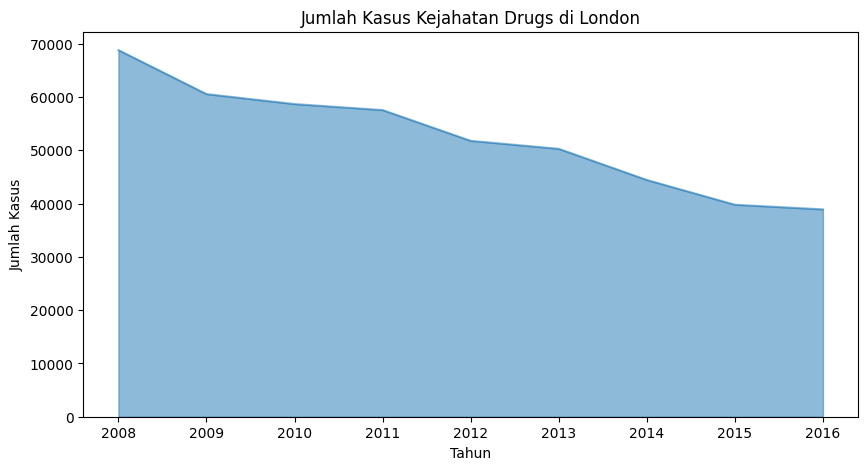

In [8]:
df_drugs = df[df['major_category'] == 'Drugs']
df_drugs.groupby('year')['value'].sum().plot(kind='area', figsize=(10, 5), stacked=False)
plt.title('Jumlah Kasus Kejahatan Drugs di London')
plt.ylabel('Jumlah Kasus')
plt.xlabel('Tahun')
plt.show()

informasi yang di dapatkan dari area plot di atas adalah jumlah kasus kejahatan drugs di London menurun dari tahun 2008 hingga 2016

<Axes: xlabel='year'>

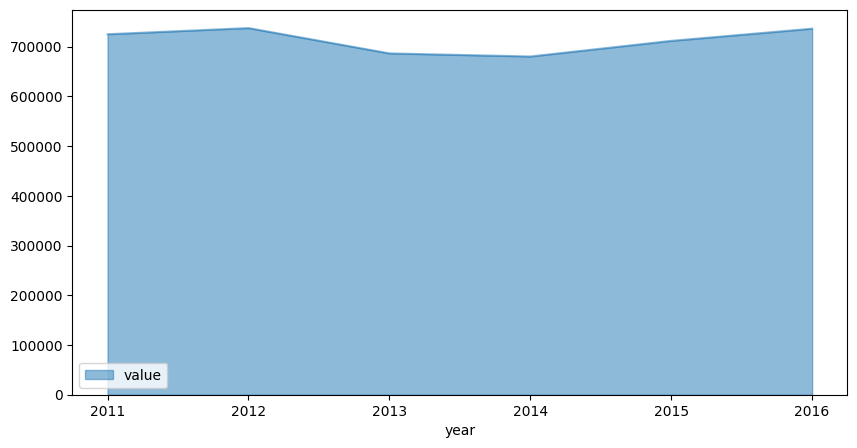

In [10]:
jumlah_kasus = tahun_count[tahun_count['year'] >= 2011]
jumlah_kasus.plot(kind='area', x='year', y='value', figsize=(10, 5), stacked=False)


dilihat dari area plot di atas, jumlah kasus kejahatan dari tahun 2011 ke 2016 menaiik, sempat mengalamai penurunan pada tahun 2014.

## histogram

In [55]:
x = tahun_count['value']

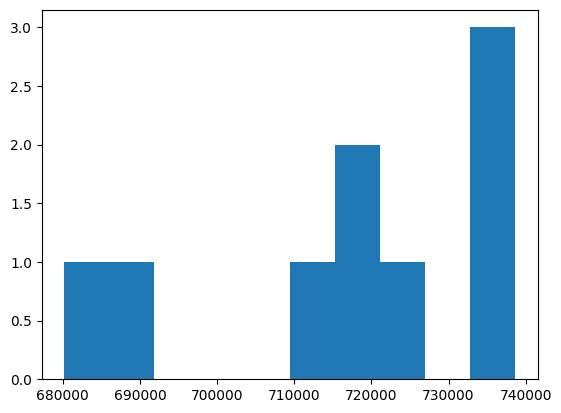

In [60]:
plt.hist(x, bins=10, range = None ,density=False, cumulative=False)
plt.show()

## bar chart

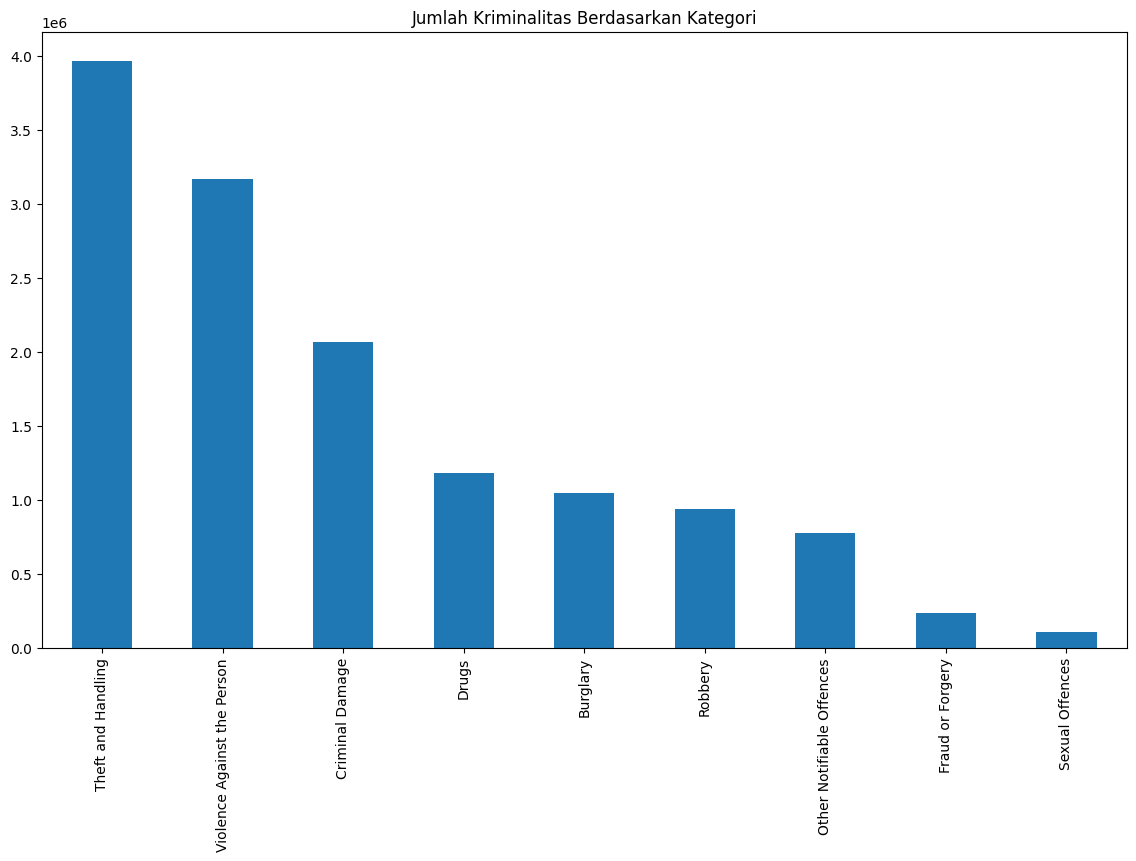

In [26]:
ax = df['major_category'].value_counts().plot(kind='bar', figsize=(14,8), title="Jumlah Kriminalitas Berdasarkan Kategori")

In [20]:
top3 = df.groupby(['borough', 'major_category'])['value'].sum().sort_values(ascending=False).groupby('borough').head(3)

In [25]:
top3 = pd.DataFrame(top3)
top3 = top3.reset_index()

,level_0,borough,major_category,value
0,0,Westminster,Theft and Handling,277617
1,1,Camden,Theft and Handling,140596
2,2,Lambeth,Theft and Handling,114899
3,3,Southwark,Theft and Handling,109432
4,4,Islington,Theft and Handling,107661
...,...,...,...,...
94,94,Sutton,Criminal Damage,14474
95,95,Kingston upon Thames,Criminal Damage,10610
96,96,City of London,Theft and Handling,561
97,97,City of London,Violence Against the Person,114


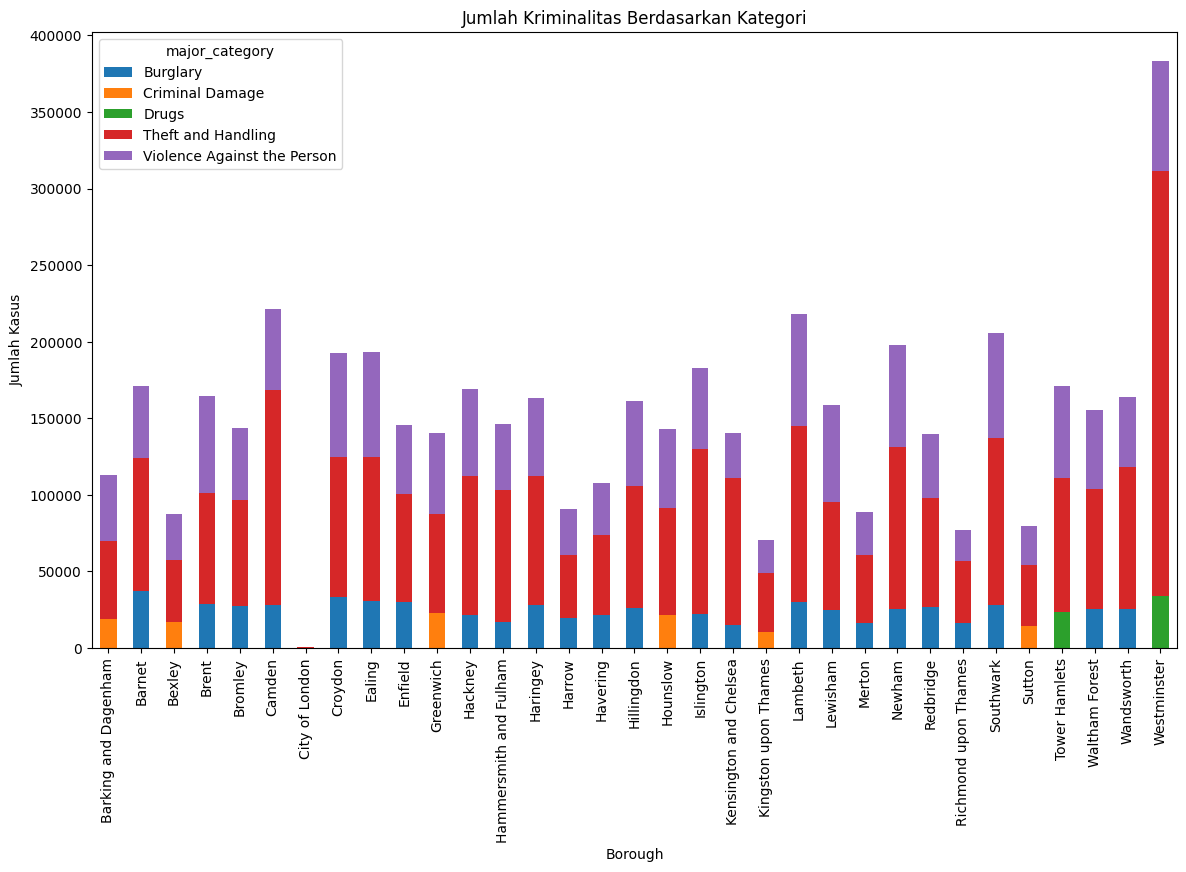

In [27]:
top3.groupby(['borough', 'major_category'])['value'].sum().unstack().plot(kind='bar', figsize=(14,8), stacked=True)
plt.title('Jumlah Kriminalitas Berdasarkan Kategori')
plt.ylabel('Jumlah Kasus')
plt.xlabel('Borough')
plt.show()

## pie chart

<Axes: title={'center': 'Jumlah Kriminalitas dari tahun 2008-2016 Berdasarkan Kategori'}, ylabel='None'>

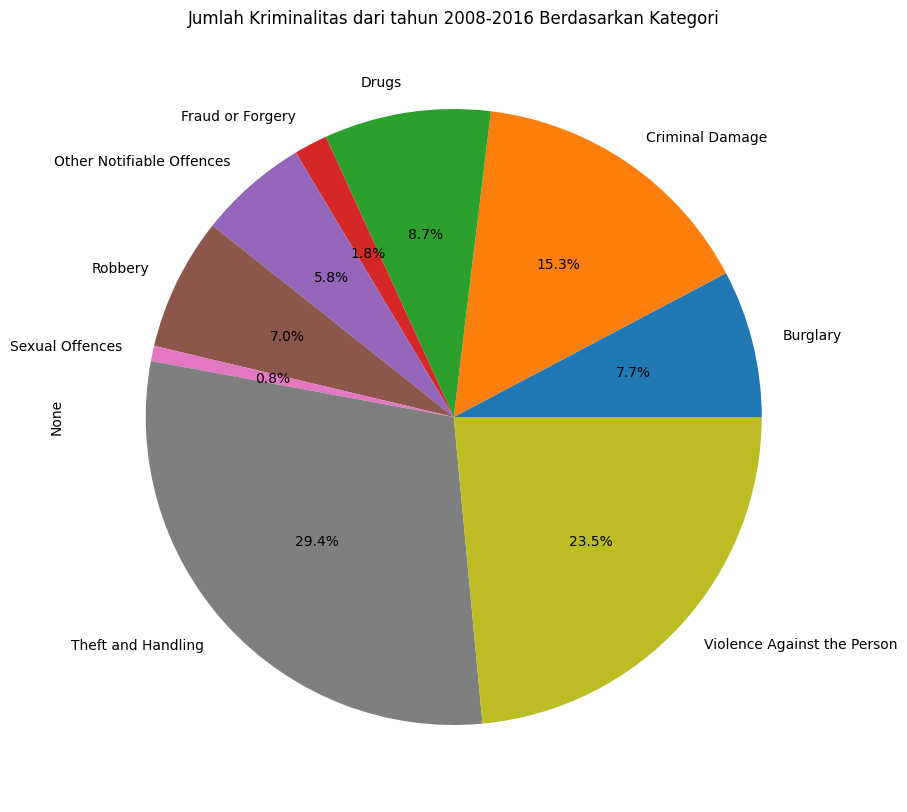

In [ ]:
# membuat pie chart berdasarkan kategori kejahatan dari tahun 2008-2016
df.groupby('major_category').size().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), title='Jumlah Kriminalitas dari tahun 2008-2016 Berdasarkan Kategori')

informasi yang di dapatkan adalah kategori theft and handling memiliki jumlah kasus terbanyak di London

## box plot

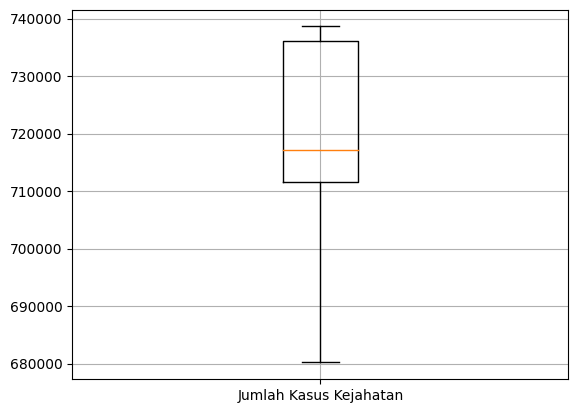

In [29]:
plt.boxplot(tahun_count, labels=['Jumlah Kasus Kejahatan'])
plt.grid()
plt.show()

## scatter plot

c:\Users\hp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


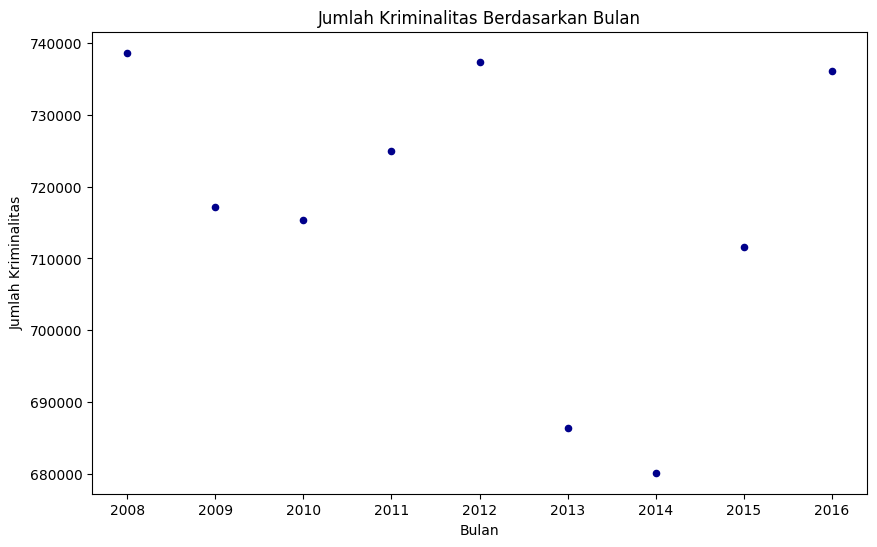

In [53]:
# scatter plot untuk mengetahui hubungan antara jumlah kejahatan dengan jumlah kejahatan yang terjadi pada bulan yang sama
tahun_count.plot(kind='scatter', x='year', y='value', figsize=(10, 6), color='darkblue')
plt.title('Jumlah Kriminalitas Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kriminalitas')
plt.show()

## word cloud

In [ ]:
# word cloud
from wordcloud import WordCloud, STOPWORDS # import library wordcloud
import re 

In [ ]:
# menggabungkan semua kata yang ada di kolom major_category
all_text = " ".join(df['borough'].values)

In [ ]:
wc = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')

In [ ]:
wc.generate(all_text)

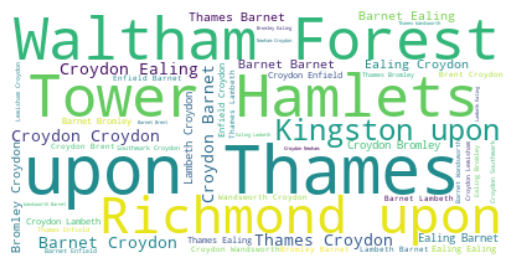

In [ ]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# masking
from PIL import Image

In [ ]:
# masking wordcloud
Image_mask = np.array(Image.open('./img/masks.jpg'))

In [ ]:
# image
Image_mask[400:501,400:501] # untuk mengetahui ukuran gambar

array([], shape=(50, 0), dtype=uint8)

(-0.5, 275.5, 449.5, -0.5)

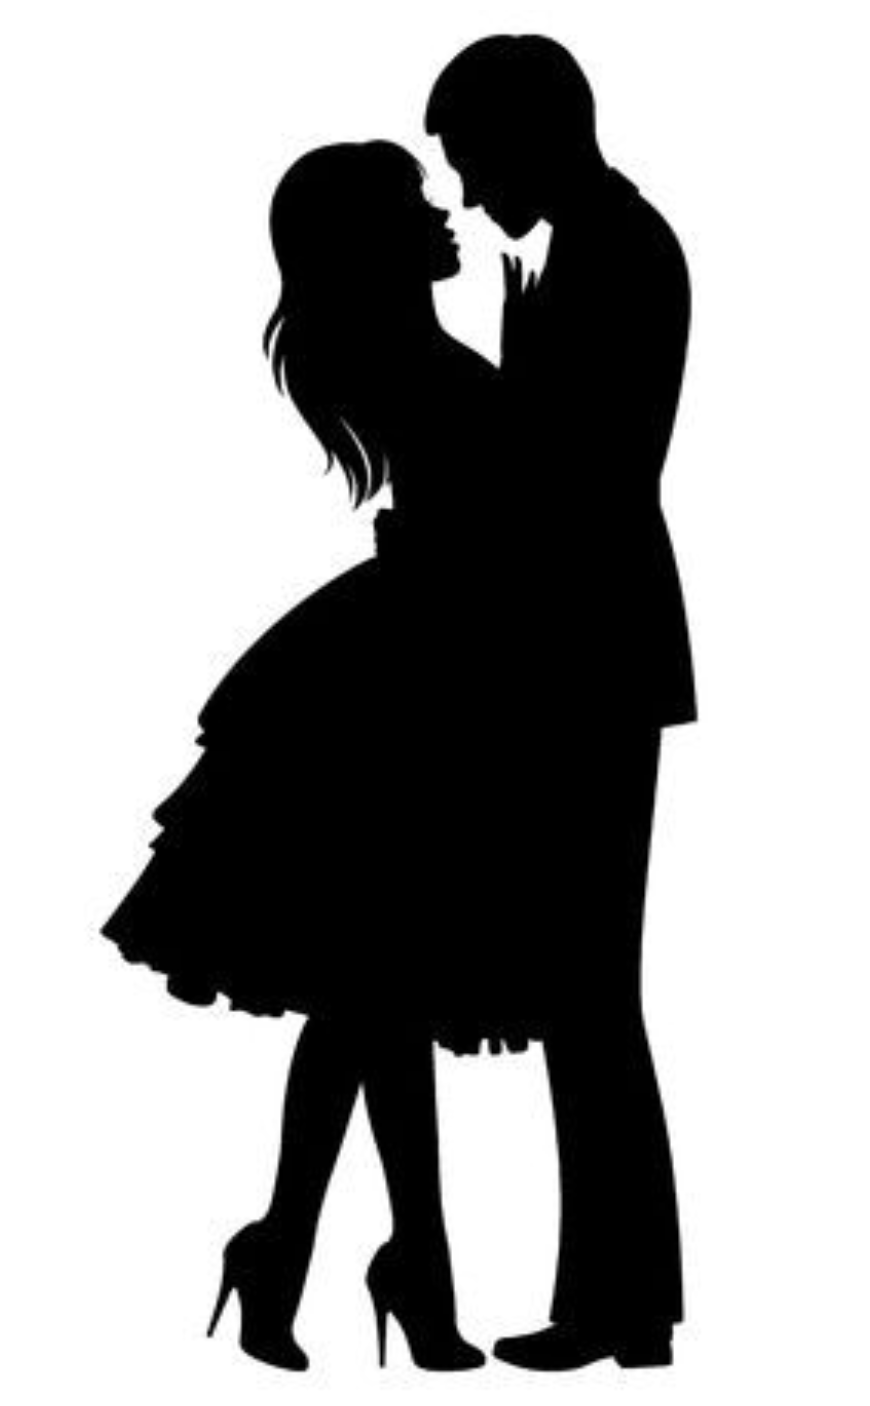

In [ ]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(Image_mask,cmap=plt.cm.gray,interpolation='bilinear')
plt.axis('off')

(-0.5, 275.5, 449.5, -0.5)

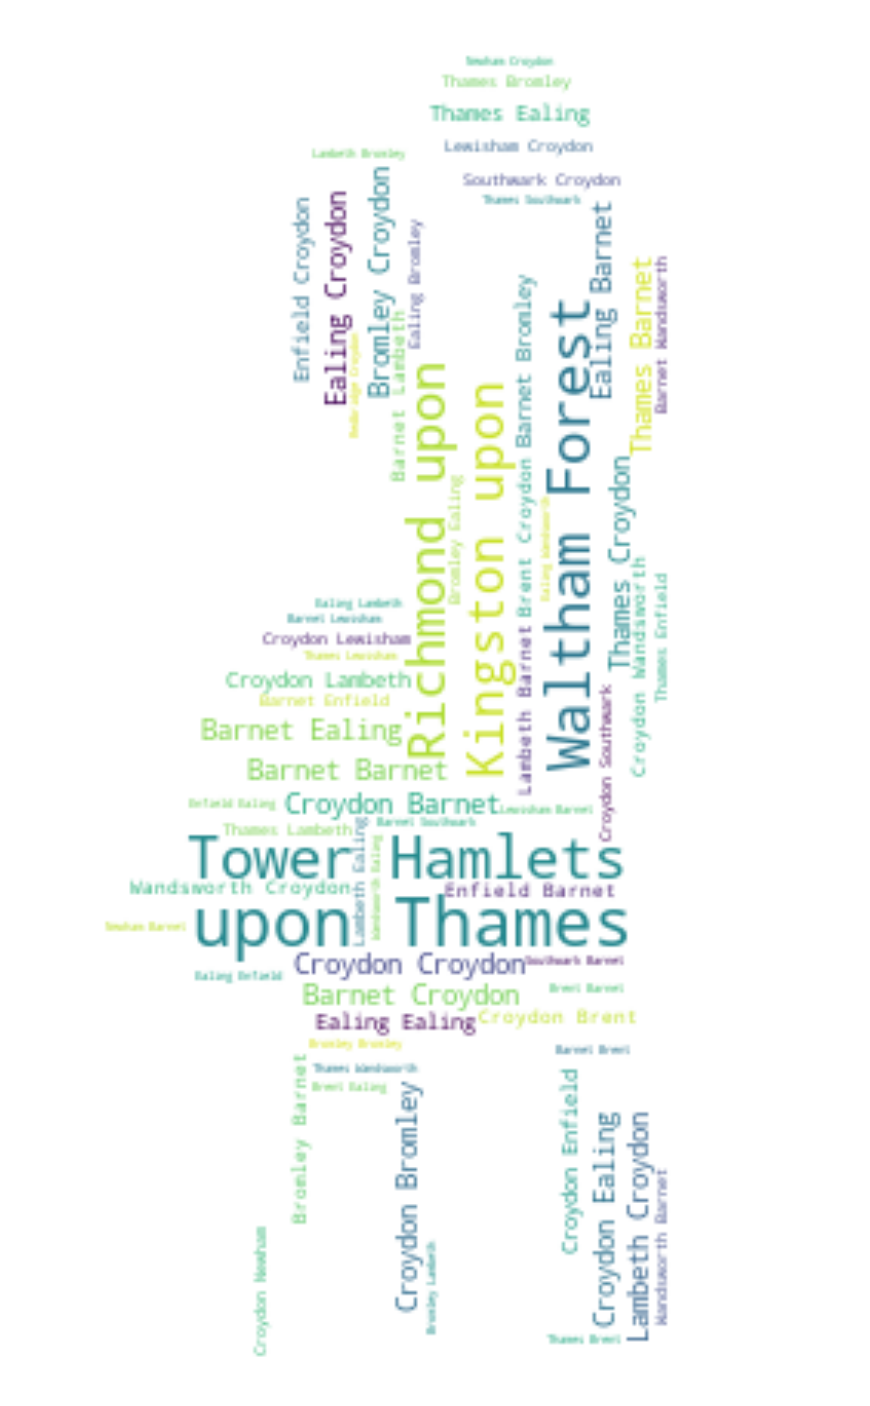

In [ ]:
mask_wordcloud = WordCloud(
    background_color = 'white'
    , max_words=2000
    , stopwords=STOPWORDS
    , mask=Image_mask
)

mask_wordcloud.generate(all_text)
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(mask_wordcloud,interpolation='bilinear')
plt.axis('off')

## follium maps

In [ ]:
# folium map
import folium # import library folium

In [ ]:
# membuat data frame baru untuk memasukan latitude dan longitude dari setiap borough
borough = {
        'borough': ['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
        'latitude': [51.5607, 51.6252, 51.4549, 51.5588, 51.4039, 51.5290, 51.5155, 51.3714, 51.5130, 51.6538, 51.4892, 51.5450, 51.4927, 51.6000, 51.5898, 51.5812, 51.5441, 51.4746, 51.5416, 51.5020, 51.4085, 51.4479, 51.4607, 51.4452, 51.4014, 51.5077, 51.5590, 51.4479, 51.5035, 51.3618, 51.5099, 51.5908, 51.4567],
        'longitude': [0.1557, -0.1517, 0.1505, -0.2817, 0.0198, -0.1255, -0.0922, -0.0977, -0.3089, -0.0799, 0.0648, -0.0553, -0.2339, -0.1119, -0.3346, 0.1837, -0.4760, -0.3680, -0.1022, -0.1947, -0.3064, -0.0203, -0.1163, -0.0209, -0.1958, 0.0469, 0.0741, -0.3260, -0.0804, -0.1945, -0.0059, -0.1910, -0.1910]}

In [ ]:
borough_df = pd.DataFrame(borough)

In [ ]:
borough_df

,borough,latitude,longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198
5,Camden,51.5290,-0.1255
6,City of London,51.5155,-0.0922
7,Croydon,51.3714,-0.0977
8,Ealing,51.5130,-0.3089
9,Enfield,51.6538,-0.0799


In [ ]:
df4 = df.groupby(['borough', 'major_category']).size().reset_index(name='count')
df4

,borough,major_category,count
0,Barking and Dagenham,Burglary,23760
1,Barking and Dagenham,Criminal Damage,46764
2,Barking and Dagenham,Drugs,26244
3,Barking and Dagenham,Fraud or Forgery,7236
4,Barking and Dagenham,Other Notifiable Offences,17496
...,...,...,...
290,Westminster,Other Notifiable Offences,21924
291,Westminster,Robbery,25056
292,Westminster,Sexual Offences,3672
293,Westminster,Theft and Handling,107136


In [ ]:
# membuat map dengan lokasi borough
map = folium.Map(location=[51.5074, 0.1278], zoom_start=10)

In [ ]:
# membuat feature group untuk menampilkan marker
incident = folium.map.FeatureGroup() 

In [ ]:
# menampilkan marker
for lat, lng, in zip(borough_df.latitude, borough_df.longitude):
    incident.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# menambahkan incident ke map
map.add_child(incident)

In [ ]:
# menambahkan pop up nama kota
for lat, lng, borough in zip(borough_df.latitude, borough_df.longitude, borough_df.borough):
    folium.Marker([lat, lng], popup=borough).add_to(map)

In [ ]:
map